# Mini-Kaggle Project 3: Forest Cover Type Prediction

Assignment Objectives:
- Goal- The goal of this project is to build predictive models that can accurately predict the forest cover type based on several cartographic variables.
1. Data Exploration: Start by exploring the dataset, understanding the features, and identifying any missing values or inconsistencies.
2. Preprocessing and Feature Engineering: Perform necessary preprocessing steps such as handling missing data and scaling features. Consider feature selection techniques to enhance model performance.
3. Model Training and Evaluation: Train different classifiers such as Perceptron, Logistic Regression, SVM, Decision Trees, KNN, and Random Forest on the preprocessed dataset. Evaluate their performance using appropriate metrics and select the best-performing model.
4. Model Deployment and Submission: Deploy the selected model on the test dataset and generate predictions. Create a submission file in the required format for evaluation.

## Loading Data and Exploring Dataset

Objectives for this section:
- Explore the dataset
- Understand the features
- Identify any missing or erroneous values

In [2]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

In [3]:
# loading datasets
train_df = pd.read_csv("/kaggle/input/mkp3data/train (2).csv")
test_df = pd.read_csv("/kaggle/input/mkp3data/test (2).csv")

Column Definitions (from Kaggle Data page):
- Elevation: Elevation in meters.
- Aspect: Aspect in degrees azimuth.
- Slope: Slope in degrees.
- Horizontal_Distance_To_Hydrology: Horizontal distance to nearest surface water features.
- Vertical_Distance_To_Hydrology: Vertical distance to nearest surface water features.
- Horizontal_Distance_To_Roadways: Horizontal distance to nearest roadway.
- Hillshade_9am: Hill shade index at 9am, summer solstice.
- Hillshade_Noon: Hill shade index at noon, summer solstice.
- Hillshade_3pm: Hill shade index at 3pm, summer solstice.
- Horizontal_Distance_To_Fire_Points: Horizontal distance to nearest wildfire ignition points.
- Wilderness_Area (4 binary columns): Wilderness area designation.
- Soil_Type (40 columns): Soil type designation with binary values (0 or 1).
- label: Target variable column indicating the forest cover type (from 1 to 7).
- id: Unique identifier for each instance in the dataset.

In [4]:
# Exploring Training Set

# checking for any missing values on training set
train_summary = train_df.info()
missing_values = train_df.isnull().sum()

# checking the basic statistics on training set
train_stats = train_df.describe()

train_summary, missing_values, train_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464809 entries, 0 to 464808
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           464809 non-null  int64
 1   Aspect                              464809 non-null  int64
 2   Slope                               464809 non-null  int64
 3   Horizontal_Distance_To_Hydrology    464809 non-null  int64
 4   Vertical_Distance_To_Hydrology      464809 non-null  int64
 5   Horizontal_Distance_To_Roadways     464809 non-null  int64
 6   Hillshade_9am                       464809 non-null  int64
 7   Hillshade_Noon                      464809 non-null  int64
 8   Hillshade_3pm                       464809 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  464809 non-null  int64
 10  Wilderness_Area1                    464809 non-null  int64
 11  Wilderness_Area2                    464809 non-null 

(None,
 Elevation                             0
 Aspect                                0
 Slope                                 0
 Horizontal_Distance_To_Hydrology      0
 Vertical_Distance_To_Hydrology        0
 Horizontal_Distance_To_Roadways       0
 Hillshade_9am                         0
 Hillshade_Noon                        0
 Hillshade_3pm                         0
 Horizontal_Distance_To_Fire_Points    0
 Wilderness_Area1                      0
 Wilderness_Area2                      0
 Wilderness_Area3                      0
 Wilderness_Area4                      0
 Soil_Type1                            0
 Soil_Type2                            0
 Soil_Type3                            0
 Soil_Type4                            0
 Soil_Type5                            0
 Soil_Type6                            0
 Soil_Type7                            0
 Soil_Type8                            0
 Soil_Type9                            0
 Soil_Type10                           0
 Soil_Typ

In [5]:
# Exploring Test Set

# checking for missing values in the test set
test_summary = test_df.info()
test_missing_values = test_df.isnull().sum()

# displaying basic statistics for the test set
test_stats = test_df.describe()

test_summary, test_missing_values, test_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116203 entries, 0 to 116202
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           116203 non-null  int64
 1   Aspect                              116203 non-null  int64
 2   Slope                               116203 non-null  int64
 3   Horizontal_Distance_To_Hydrology    116203 non-null  int64
 4   Vertical_Distance_To_Hydrology      116203 non-null  int64
 5   Horizontal_Distance_To_Roadways     116203 non-null  int64
 6   Hillshade_9am                       116203 non-null  int64
 7   Hillshade_Noon                      116203 non-null  int64
 8   Hillshade_3pm                       116203 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  116203 non-null  int64
 10  Wilderness_Area1                    116203 non-null  int64
 11  Wilderness_Area2                    116203 non-null 

(None,
 Elevation                             0
 Aspect                                0
 Slope                                 0
 Horizontal_Distance_To_Hydrology      0
 Vertical_Distance_To_Hydrology        0
 Horizontal_Distance_To_Roadways       0
 Hillshade_9am                         0
 Hillshade_Noon                        0
 Hillshade_3pm                         0
 Horizontal_Distance_To_Fire_Points    0
 Wilderness_Area1                      0
 Wilderness_Area2                      0
 Wilderness_Area3                      0
 Wilderness_Area4                      0
 Soil_Type1                            0
 Soil_Type2                            0
 Soil_Type3                            0
 Soil_Type4                            0
 Soil_Type5                            0
 Soil_Type6                            0
 Soil_Type7                            0
 Soil_Type8                            0
 Soil_Type9                            0
 Soil_Type10                           0
 Soil_Typ

In [6]:
# checking for any duplicate rows
duplicate_rows_train = train_df.duplicated().sum()
duplicate_rows_test = test_df.duplicated().sum()

print(f"Duplicate rows in training set: {duplicate_rows_train}")
print(f"Duplicate rows in test set: {duplicate_rows_test}")

Duplicate rows in training set: 0
Duplicate rows in test set: 0


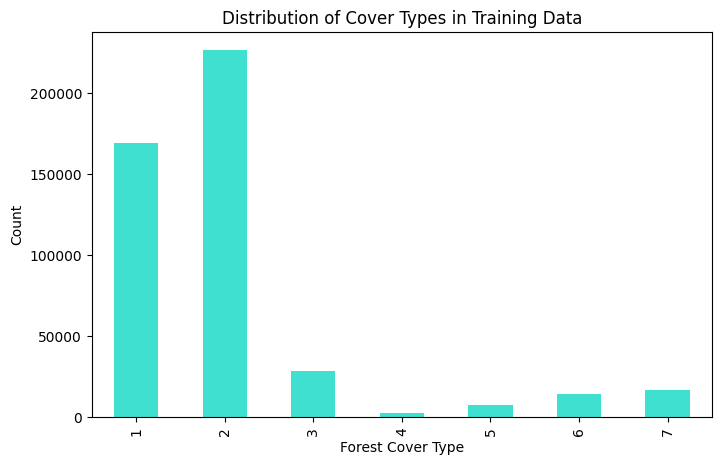

In [7]:
# plotting the distribution of cover types
plt.figure(figsize=(8,5))
train_df['label'].value_counts().sort_index().plot(kind='bar', color='turquoise')
plt.xlabel("Forest Cover Type")
plt.ylabel("Count")
plt.title("Distribution of Cover Types in Training Data")
plt.show()

This distribution plot of cover types shows a significant class imbalance, with cover types 1 and 2 dominating while others have much fewer instances. This can affect model performance, as some classes may be underrepresented, leading to biased predictions. I will likely try a stratified split and possibly SMOTE to keep the sets proportionally represented.

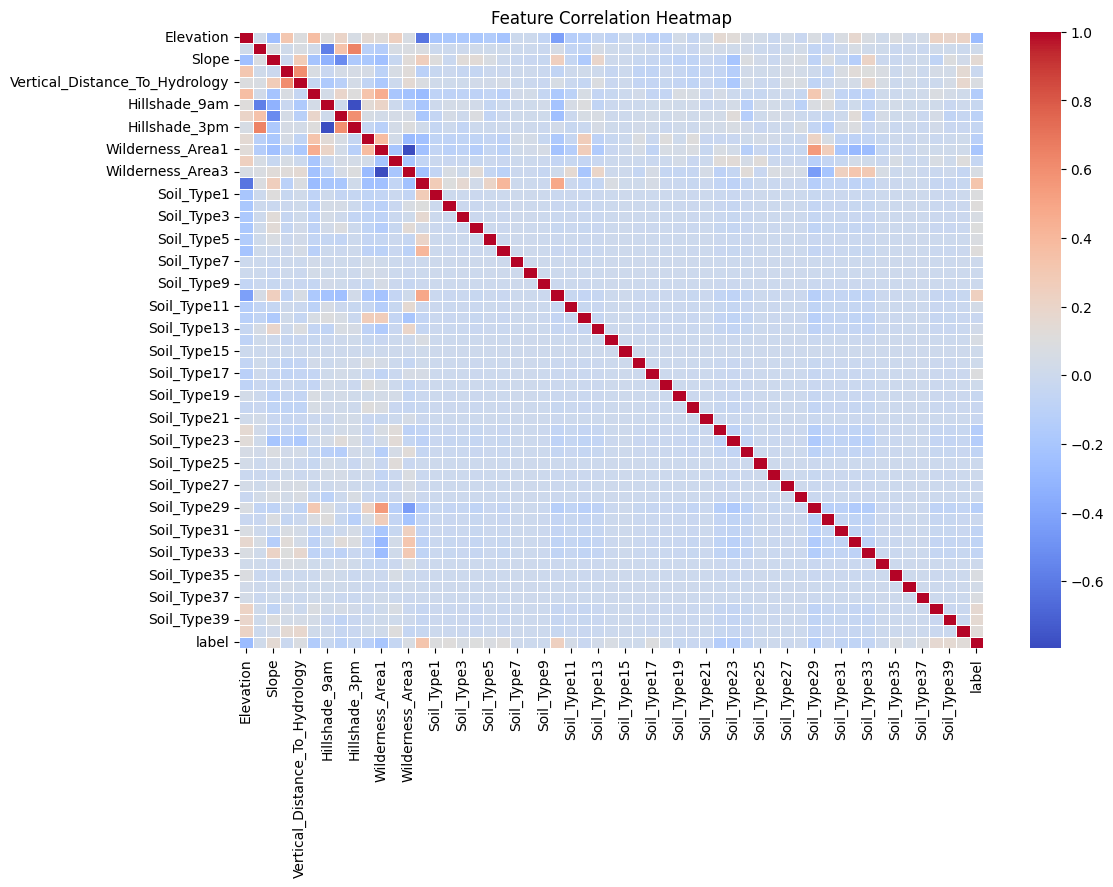

In [8]:
# computing correlation matrix
corr_matrix = train_df.drop(columns=['id']).corr()

# plotting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

This correlation heatmap shows most features don’t strongly relate to the target, suggesting that non-linear models like Decision Trees, Random Forest, or SVM may work better than Logistic Regression. Some numerical features, like Elevation, Slope, and Hydrology distances, are correlated, and the Hillshade values might be redundant, so dropping one could possibly help, but I'd like to try keeping them all for now. Soil Type and Wilderness Area features are binary and don’t correlate much with each other or the label, but tree-based models should be able to handle them without extra encoding.

In [9]:
# checking correlation between Hillshade features
train_df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].corr()

,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
Hillshade_9am,1.000000,0.008581,-0.780875
Hillshade_Noon,0.008581,1.000000,0.594640
Hillshade_3pm,-0.780875,0.594640,1.000000


This correlation table shows that Hillshade_9am and Hillshade_3pm have a strong negative correlation (-0.78) and that Hillshade_Noon has a weaker correlation with the other two (0.59 with 3pm, 0.008 with 9am).

Summary for Data Exploration:
- No missing values in train set and no missing values in test set
- No duplicate rows
- Train Dataset:
    - Size: 464,809 entries, 56 columns
    - Target Variable: label (indicates forest cover type from 1 to 7)
    - Features are numerical and include elevation, aspect, slope, distances, hillshade values, and categorical soil types.
- Test Dataset:
    - Size: 116203 entries, 55 columns (no label column, as expected)
    - Same feature types as training dataset

## Preprocessing the Data

Objectives for this section:
- Handling missing values
- Scaling features
- Consider feature selection

In [10]:
# creating a new categorical Soil Type column
soil_cols = [col for col in train_df.columns if "Soil_Type" in col]
train_df["Soil_Type_Combined"] = train_df[soil_cols].idxmax(axis=1)

# applying same transformation to the test set
test_df["Soil_Type_Combined"] = test_df[soil_cols].idxmax(axis=1)

# dropping the original Soil Type columns
train_df = train_df.drop(columns=soil_cols)
test_df = test_df.drop(columns=soil_cols)

# checking results
print(train_df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       3031      38      8                               192   
1       2717      66     14                               384   
2       3172      24      9                               300   
3       3089      67      2                               285   
4       2569      22     20                               216   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              40                               30   
1                             -19                              927   
2                              27                             2389   
3                             -37                             2424   
4                              87                             1095   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            220             223            138   
1            233             211            108   
2            215             220   

In [11]:
# splitting features (X) and target variable (y)
X = train_df.drop(columns=['label', 'id'])
y = train_df['label']

# stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=22)

# checking shapes
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Train set shape: (371847, 15)
Validation set shape: (92962, 15)


In [12]:
# identifying numerical columns
num_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
            'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
            'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# initializing scaler
scaler = StandardScaler()

# scaling numerical features
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
test_df[num_cols] = scaler.transform(test_df.drop(columns=['id'])[num_cols])


In [13]:
# initializing label encoder
le = LabelEncoder()

# fitting and transforming Soil Type Combined
X_train["Soil_Type_Combined"] = le.fit_transform(X_train["Soil_Type_Combined"])
X_val["Soil_Type_Combined"] = le.transform(X_val["Soil_Type_Combined"])  # Apply same transformation to validation set
test_df["Soil_Type_Combined"] = le.transform(test_df["Soil_Type_Combined"])  # Apply to test set as well

# checking transformed values
print(X_train["Soil_Type_Combined"].unique())

# applying SMOTE on training data
smote = SMOTE(random_state=22)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# checking new shape after SMOTE
print("Resampled training set shape:", X_train_resampled.shape)

[ 1 28 36  2 26 14 25 21 23  3 34 22 31 15 16 33 18 17 11 24 10  4 32  8
 12 35  9  7  0 20 39 13 27 30  5 19 38 29 37  6]
Resampled training set shape: (1269513, 15)


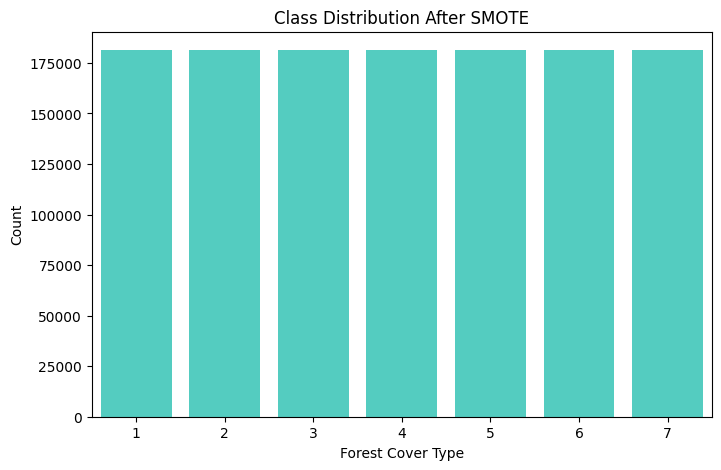

In [14]:
# plotting the distribution of cover types after SMOTE
plt.figure(figsize=(8,5))
sns.countplot(x=y_train_resampled, color = "turquoise")
plt.xlabel("Forest Cover Type")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

## Model Training and Evaluation

Objectives for this section: 
- Train different classifiers such as Perceptron, Logistic Regression, SVM, Decision Trees, KNN, and Random Forest on the preprocessed dataset
- Evaluate their performance using appropriate metrics
- Select the best-performing model

### Perceptron

In [15]:
# initializing Perceptron model
perceptron_model = Perceptron(max_iter=500, random_state=22)

# training Perceptron model
perceptron_model.fit(X_train_resampled, y_train_resampled)

# predicting on validation set
y_val_pred_perceptron = perceptron_model.predict(X_val)

# evaluating performance
val_accuracy_perceptron = accuracy_score(y_val, y_val_pred_perceptron)
print(f"Validation Accuracy (Perceptron): {val_accuracy_perceptron:.4f}")

# classification report
print("Classification Report (Perceptron):")
print(classification_report(y_val, y_val_pred_perceptron))

Validation Accuracy (Perceptron): 0.3083
Classification Report (Perceptron):
              precision    recall  f1-score   support

           1       0.51      0.60      0.55     33913
           2       0.86      0.04      0.08     45340
           3       0.82      0.04      0.08      5697
           4       0.19      0.88      0.32       440
           5       0.05      0.74      0.09      1513
           6       0.15      0.65      0.24      2774
           7       0.22      0.92      0.35      3285

    accuracy                           0.31     92962
   macro avg       0.40      0.55      0.25     92962
weighted avg       0.67      0.31      0.27     92962



Summary for Perceptron:
- The Perceptron model didn't perform well, with a low accuracy (~30%) and inconsistent predictions across the different cover types. While it was able to correctly classify some common categories, it struggled with the minority ones, meaning it didn't generalize well to the dataset. Perceptron is a simple linear model, and it may not be the best choice for this complex dataset.

### Logistic Regression

In [16]:
# initializing Logistic Regression
logreg_model = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=22)

# training model
logreg_model.fit(X_train_resampled, y_train_resampled)

# predicting
y_val_pred_logreg = logreg_model.predict(X_val)

# evaluating
val_accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
print(f"Validation Accuracy (Logistic Regression): {val_accuracy_logreg:.4f}")
print("Classification Report (Logistic Regression):")
print(classification_report(y_val, y_val_pred_logreg))

Validation Accuracy (Logistic Regression): 0.5538
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       0.66      0.64      0.65     33913
           2       0.79      0.46      0.58     45340
           3       0.68      0.49      0.57      5697
           4       0.26      0.85      0.39       440
           5       0.09      0.79      0.16      1513
           6       0.31      0.64      0.42      2774
           7       0.34      0.89      0.49      3285

    accuracy                           0.55     92962
   macro avg       0.44      0.68      0.46     92962
weighted avg       0.69      0.55      0.59     92962



Summary for Logistic Regression:
- The Logistic Regression model had a validation accuracy of ~55%, meaning it got a little over half of the predictions correct. It worked well for some cover types but really struggled with the smaller classes. Since logistic regression assumes a linear relationship, it likely had trouble capturing the more complicated patterns in the dataset. The macro F1 score was low, showing that it wasn’t treating all the classes equally.

### Support Vector Machine (SVM)

In [16]:
from sklearn.utils import resample

# defining downsampling fraction
downsample_fraction = 0.1

# creating a copy of the dataset specifically for SVM
X_svm, y_svm = X_train_resampled.copy(), y_train_resampled.copy()

# making downsampling easier
svm_data = pd.concat([X_svm, y_svm], axis=1)

# function to downsample each class separately
def downsample_group(group):
    return group.sample(frac=downsample_fraction, random_state=22)

# trying to get this downsampling without warning (but couldn't get the warning to go away)
svm_downsampled = svm_data.groupby("label", group_keys=False).apply(downsample_group).reset_index(drop=True)

# splitting features and labels
X_svm_downsampled = svm_downsampled.drop(columns=["label"])
y_svm_downsampled = svm_downsampled["label"]

# checking new dataset size
print(f"Original dataset size: {X_svm.shape[0]}")
print(f"Downsampled dataset size: {X_svm_downsampled.shape[0]}")

Original dataset size: 1269513
Downsampled dataset size: 126952


<ipython-input-16-eb61b62a5158>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  svm_downsampled = svm_data.groupby("label", group_keys=False).apply(downsample_group).reset_index(drop=True)


In [17]:
# training model
svm_model = SVC(kernel='rbf', random_state=22)

# training on downsampled dataset
svm_model.fit(X_svm_downsampled, y_svm_downsampled)

# predicting on validation set
y_val_pred_svm = svm_model.predict(X_val)

# evaluating performance
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print(f"Validation Accuracy (SVM): {val_accuracy_svm:.4f}")

print("Classification Report (SVM):")
print(classification_report(y_val, y_val_pred_svm))

Validation Accuracy (SVM): 0.5797
Classification Report (SVM):
              precision    recall  f1-score   support

           1       0.67      0.66      0.67     33913
           2       0.80      0.48      0.60     45340
           3       0.68      0.58      0.62      5697
           4       0.25      0.92      0.39       440
           5       0.10      0.85      0.18      1513
           6       0.33      0.64      0.44      2774
           7       0.38      0.88      0.54      3285

    accuracy                           0.58     92962
   macro avg       0.46      0.72      0.49     92962
weighted avg       0.70      0.58      0.61     92962



Summary for SVM:
- I struggled with this model. Even after downsampling it was still very slow to run buut eventually did! When SVM finally finished running, it did better than Logistic Regression with a validation accuracy of ~57.97% and a macro F1 score of 0.49. It was able to classify more of the minority classes correctly, especially compared to models like Logistic Regression, which struggled with the rare classes. That said, it still wasn’t as strong as Random Forest or Decision Tree, which had much higher scores. Plus, SVM took way longer to train, making it less practical for large datasets like this.

### Decision Tree

In [20]:
# training Decision Tree
dt_model = DecisionTreeClassifier(random_state=22)
dt_model.fit(X_train_resampled, y_train_resampled)

# predicting on validation set
y_val_pred_dt = dt_model.predict(X_val)

# evaluating performance
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print(f"Validation Accuracy (Decision Tree): {val_accuracy_dt:.4f}")

# classification report
print("Classification Report (Decision Tree):")
print(classification_report(y_val, y_val_pred_dt))

Validation Accuracy (Decision Tree): 0.9264
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.93      0.93      0.93     33913
           2       0.94      0.93      0.94     45340
           3       0.91      0.91      0.91      5697
           4       0.79      0.84      0.82       440
           5       0.75      0.87      0.81      1513
           6       0.82      0.87      0.85      2774
           7       0.92      0.94      0.93      3285

    accuracy                           0.93     92962
   macro avg       0.87      0.90      0.88     92962
weighted avg       0.93      0.93      0.93     92962



Summary for Decision Tree:
- The Decision Tree model performed very well with an accuracy of ~92.6%. It was able to learn patterns in the dataset and make accurate classifications. However, decision trees can overfit to the training data, meaning they may not perform as well on completely new data. Still, this model showed strong performance, making it a solid choice.

### K-Nearest Neighbors (KNN)

In [22]:
# initializing KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# training KNN model
knn_model.fit(X_train_resampled, y_train_resampled)

# predicting on validation set
y_val_pred_knn = knn_model.predict(X_val)

# evaluating performance
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print(f"Validation Accuracy (KNN): {val_accuracy_knn:.4f}")

# classification report
print("Classification Report (KNN):")
print(classification_report(y_val, y_val_pred_knn))

Validation Accuracy (KNN): 0.9146
Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.92      0.92      0.92     33913
           2       0.95      0.91      0.93     45340
           3       0.89      0.91      0.90      5697
           4       0.71      0.82      0.76       440
           5       0.59      0.94      0.73      1513
           6       0.75      0.88      0.81      2774
           7       0.87      0.98      0.92      3285

    accuracy                           0.91     92962
   macro avg       0.81      0.91      0.85     92962
weighted avg       0.92      0.91      0.92     92962



Summary for KNN:
- The KNN model actually did really well, hitting about 91.5% accuracy! This shows that checking the "nearest neighbors" in the dataset was a pretty good way to classify the forest cover types. The downside was that KNN can be slow (though not slower than SVM!), since it has to compare every new point to all the others before making a decision. So while it gave great results, it might not be the best option if speed is an issue. 

### Random Forest (the model I chose)

In [23]:
# training Random Forest
rf_model = RandomForestClassifier(random_state=22)
rf_model.fit(X_train_resampled, y_train_resampled)

# predicting on validation set
val_predictions = rf_model.predict(X_val)

# evaluating model performance
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy (Random Forest): {val_accuracy:.4f}")

# classification report
print(classification_report(y_val, val_predictions))

Validation Accuracy (Random Forest): 0.9558
              precision    recall  f1-score   support

           1       0.96      0.95      0.96     33913
           2       0.96      0.96      0.96     45340
           3       0.93      0.96      0.95      5697
           4       0.87      0.86      0.87       440
           5       0.86      0.91      0.88      1513
           6       0.89      0.92      0.91      2774
           7       0.96      0.97      0.97      3285

    accuracy                           0.96     92962
   macro avg       0.92      0.93      0.93     92962
weighted avg       0.96      0.96      0.96     92962



Summary for Random Forest:
- The Random Forest model was the best performer, achieving a validation accuracy of ~95.6%! It handled the dataset well and made accurate predictions across all classes. Since Random Forest is an ensemble model (meaning it combines multiple decision trees), it learned patterns better and was less likely to overfit compared to a single decision tree. This was the top performer for me on Kaggle, making it the best choice for final submission.

#### Compare all models on training performance

| Model               | Accuracy | Macro F1 Score |
|---------------------|----------|---------------|
| Perceptron         | 0.3083   | 0.25          |
| Logistic Regression | 0.5538   | 0.46          |
| SVM                | 0.5797   | 0.49          |
| Decision Tree      | 0.9264   | 0.88          |
| KNN               | 0.9146   | 0.85          |
| Random Forest      | 0.9558   | 0.93          |

## Model Deployment and Submission

Objectives for this section:
- Deploy the selected model on the test dataset
- Generate predictions
- Create a submission file in the required format for evaluation

##### Testing on Random Forest with test set

In [24]:
# training the final Random Forest model on the entire training set
rf_final = RandomForestClassifier(random_state=22)
rf_final.fit(X_train_resampled, y_train_resampled)

# predicting on the test set
y_test_pred_rf = rf_final.predict(test_df.drop(columns=["id"]))

# creating the submission dataframe
submission_rf = pd.DataFrame({
    "id": test_df["id"],  
    "label": y_test_pred_rf
})

# saving to CSV
submission_rf.to_csv("submission_rf.csv", index=False)

# printing the first few rows to confirm the format
print("Random Forest Submission File Preview:")
print(submission_rf.head())

Random Forest Submission File Preview:
       id  label
0  376970      2
1   59898      1
2  247101      6
3  111533      2
4  522295      1


## Final Model Selection (I chose Random Forest)

Summary for Model Deployment:
- Looking at how the models performed, there were some big differences. Perceptron struggled the most, getting only 30.8% accuracy and a macro F1 score of 0.25, which means it really didn’t handle the different cover types well. Logistic Regression did a bit better with 55.4% accuracy, but its macro F1 of 0.46 shows it still favored the more common types and didn’t balance predictions well.

- On the other hand, Decision Tree and KNN did great, both hitting over 91% accuracy, with macro F1 scores around 0.85-0.88, meaning they were much better at classifying all the forest types. SVM wasn’t as strong as Random Forest or Decision Tree, which had much higher scores. But Random Forest was the best by far, with 95.6% accuracy and a macro F1 of 0.93, showing that it not only got the most predictions right but also handled all the different cover types the best.

- Accuracy shows the overall percentage of correct predictions, but the macro F1 score is important because it makes sure the model isn’t just getting the common classes right while ignoring the rare ones. Since Random Forest had the best results in both accuracy and macro F1, it was the strongest model for this dataset.

- Since I saved the Random Forest model CSV first (since it performed best on the training data) and it beat the benchmark (it scored just over 93%), I only needed to submit one file to Kaggle! :)